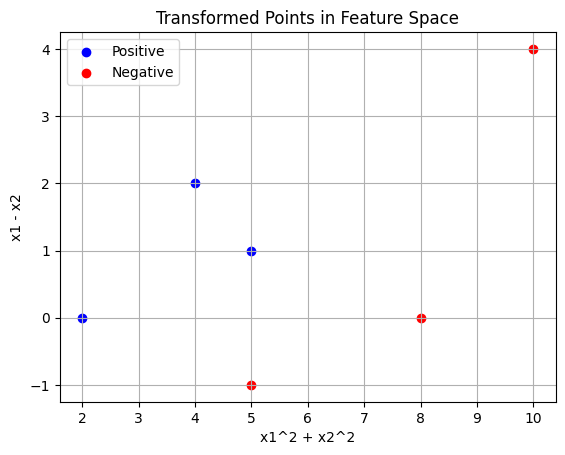

In [1]:
import matplotlib.pyplot as plt

# Transformed points
points = [
    (2, 0, 1),   # phi(x1)
    (5, 1, 1),   # phi(x2)
    (4, 2, 1),   # phi(x3)
    (5, -1, -1), # phi(x4)
    (8, 0, -1),  # phi(x5)
    (10, 4, -1)  # phi(x6)
]

# Separate positive and negative points
positive_points = [p for p in points if p[2] == 1]
negative_points = [p for p in points if p[2] == -1]

# Plot points
plt.scatter([p[0] for p in positive_points], [p[1] for p in positive_points], color='blue', label='Positive')
plt.scatter([p[0] for p in negative_points], [p[1] for p in negative_points], color='red', label='Negative')
plt.legend()
plt.xlabel('x1^2 + x2^2')
plt.ylabel('x1 - x2')
plt.title('Transformed Points in Feature Space')
plt.grid(True)
plt.show()


In [3]:
import numpy as np
from cvxopt import matrix, solvers

# Define the kernel function
def kernel(x1, x2):
    return np.dot(x1, x2)

# Transformed points and labels
points = np.array([
    [1, 1],
    [2, 1],
    [2, 0],
    [1, 2],
    [2, 2],
    [1, -3]
])

labels = np.array([1, 1, 1, -1, -1, -1])

# Number of points
n = len(labels)

# Kernel matrix
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = kernel(points[i], points[j])
C=0.1
# Define the quadratic programming problem
P = matrix(np.outer(labels, labels) * K)
q = matrix(-np.ones(n))
G = matrix(np.vstack((-np.eye(n), np.eye(n))))
h = matrix(np.hstack((np.zeros(n), np.ones(n) * C)))
A = matrix(labels, (1, n), 'd')
b = matrix(0.0)

# Solve the quadratic programming problem
solution = solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(solution['x'])

# Support vectors have non zero lagrange multipliers
sv = alphas > 1e-5
alpha_sv = alphas[sv]
points_sv = points[sv]
labels_sv = labels[sv]

# Calculate weights
w = np.sum(alpha_sv[:, None] * labels_sv[:, None] * points_sv, axis=0)

# Calculate bias
b = np.mean(labels_sv - np.dot(points_sv, w))

print("Optimal weights:", w)
print("Optimal bias:", b)


     pcost       dcost       gap    pres   dres
 0: -3.0878e+00 -1.2889e+00  3e+01  5e+00  8e-16
 1: -4.8729e-01 -1.2132e+00  8e-01  1e-02  6e-16
 2: -5.4618e-01 -6.2068e-01  8e-02  1e-03  3e-16
 3: -5.8864e-01 -5.9072e-01  2e-03  3e-05  3e-16
 4: -5.8999e-01 -5.9001e-01  2e-05  3e-07  4e-16
 5: -5.9000e-01 -5.9000e-01  2e-07  3e-09  4e-16
Optimal solution found.
Optimal weights: [0.09999996 0.09999973]
Optimal bias: -0.19999981122475738
